# Artificial Intelligence - Laboratory 03 : State-Space Search

## Introduction

State-space search or pathfinding requires a sequence of actions in the space of states \begin{equation*} s_{0} \mapsto s_{f} \end{equation*} which can be:
* explored, 
* discovered(frontier), 
* unexplored.

**A\*** is the most widespread option for this type of problems in AI: the algorithm finds the shortest path and uses a heuristic to guide itself.

## Today's Challenge

Given a bidimensional map with various obstacles, find the shortest path between two positions within it.

_Note:_ The **labyrinth** variable will play the role of the bidimensional map.

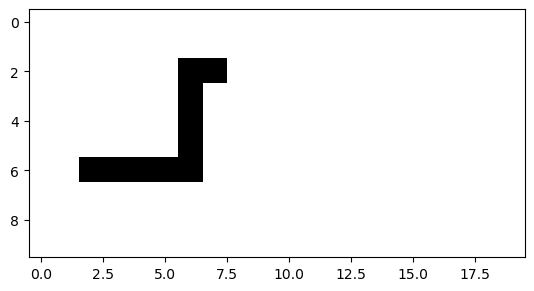

In [1]:
# Dimensions of the map.
height = 10
width = 20

# Bidimensional map as a list of lists.
# The empty cells are marked with 0, while blocks of walls with 1.
labyrinth = [[0 for c in range(width)] for r in range(height)]

for r in range(2, 7):
    labyrinth[r][6] = 1
    labyrinth[6][r] = 1
labyrinth[2][7] = 1

# Display labyrinth
%matplotlib inline
import matplotlib.pyplot as pyplot
pyplot.imshow(labyrinth, cmap='Greys', interpolation='nearest')
pyplot.show()

## Advanced functions

To simplify the iteration process, we can use: 

* `lambda`, the anonymous function which always returns an expression and has the following syntax:

```python
    lambda arguments: expression
```

In [2]:
# For this problem, we want to find the path 
# from the start point

start = (5, 5)

# to the end point.
final = (8, 8)

# Let us verify if having a list of tuples,
# their position corresponds to the endpoint.

# First, the lambda function:
is_final = lambda position: position == final

Lambda plays the role of an input argument in other functions, such as:

* `map`, which passes each element of the given iterable to a function:

```python
    map(function, iterable)
```

In [3]:
# Second, the map function:
list(map(is_final, [(1,1), (3, 6), (8, 8)]))

[False, False, True]

* `filter` can easily select the values from a sequence with a certain property:

```python
    filter(function, sequence)
```

In [4]:
list(filter(is_final, [(1,1), (3, 6), (8, 8)]))

[(8, 8)]

## The A* algorithm

With the help of the following tasks, create the building blocks of the algorithm.

### Task 0

**a.** Given a certain position represented by a `tuple`, find if its location is valid.

While exploring the bidirectional map, be careful to:

* check if the available coordinates are inside the plane (0-height, 0-width),
* verify if the position is free and not occupied by an obstacle.

In [ ]:
"""**a.** Given a certain position represented by a `tuple`, find if its location is valid.

While exploring the bidirectional map, be careful to:

* check if the available coordinates are inside the plane (0-height, 0-width),
* verify if the position is free and not occupied by an obstacle."""

def verify_location(position):
    # treat position as (row, col)
    row, col = position
    if 0 <= row < height and 0 <= col < width:
        return labyrinth[row][col] == 0  # True if free cell (0)
    return False  # Out of bounds 


In [6]:
list(map(verify_location, [(-1,2), (height,3), (width,4), (5,5), (6,6), (0,9)])) 
# expected answer: [False, False, False, True, False, True]

[False, False, False, True, False, True]

**b.** Once you have verified the position, return its empty neighbours in a `list`.

Use both `filter` function and `verifiy_location` written above.

In [ ]:
def get_neighbours(position):
    row, col = position
    neighbours = [
        (row+1, col+1), (row,   col+1), (row+1, col),
        (row-1, col-1), (row-1, col),   (row,   col-1),
        (row+1, col-1), (row-1, col+1)
    ]
    return list(filter(verify_location, neighbours)) # only the empty neighbours

In [8]:
[get_neighbours(p) for p in [(0,9), (5,5)]]
# expected answer: [[(1, 10), (0, 10), (1, 9), (0, 8), (1, 8)], [(4, 4), (4, 5), (5, 4)]]

[[(1, 10), (0, 10), (1, 9), (0, 8), (1, 8)], [(4, 4), (4, 5), (5, 4)]]

### Heuristic search

After checking the surroundings, we want to expand our frontier towards the goal, rather than searching for all possible directions.

### Task 1

**a.** Compute the _Euclidean distance_:

For two dimensions: 

\begin{equation*}
d(x, y) = \sqrt{(x_{1} - x_{2})^{2} + (y_{1} - y_{2})^{2}}
\end{equation*}

In [9]:
from math import sqrt

In [10]:
def euclidean_distance(a, b):
    distance = sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    return distance

In [11]:
euclidean_distance((2,3), (4, 7))
# expected answer: 4.47213595499958

4.47213595499958

**b.** Compute the _Manhattan distance_:

For two dimensions: 

\begin{equation*}
d(x, y) = \left | x_{1} - x_{2} \right | +  \left | y_{1} - y_{2} \right |
\end{equation*}

In [12]:
def manhattan_distance(a, b):
    distance = abs(a[0] - b[0]) + abs(a[1] - b[1])
    return distance

In [13]:
manhattan_distance((2,3), (4,0))
# expected answer: 5

5

To decide which location should be first checked from the _frontier_, we need to verify if the new possible route is better than the best previous one.

In practice, this could be accomplished using a **Priority Queue**. 

In [14]:
from heapq import heappop, heappush

priority_queue = []
heappush(priority_queue, ((1, 2), 'cost_so_far: 2'))
heappush(priority_queue, ((0, 1), 'cost_so_far: 1'))
heappush(priority_queue, ((1, 4), 'cost_so_far: 3'))

print(heappop(priority_queue))
print(heappop(priority_queue))
print(heappop(priority_queue))

((0, 1), 'cost_so_far: 1')
((1, 2), 'cost_so_far: 2')
((1, 4), 'cost_so_far: 3')


The frontier uses a priority queue for expansion and has the following structure: 

`frontier[(discovered_nodes_as_tuple), (estimated_cost, node)]`

Save the discovered nodes in a dictionary:

`d[new_node] = (parent, cost_so_far)`

* The movement between cells costs one unit and represents the `real cost g` which helps in measuring the actual distance.
* The estimated distance to the goal is given by the `heuristic function` defined before.

### Task 2

**a.** Implement **A\*** algorithm which receives as arguments the start node, the final node and the heuristic function.

In [15]:
from heapq import heappop, heappush

In [ ]:

from heapq import heappop, heappush
from itertools import count

# inspiration: https://www.datacamp.com/tutorial/a-star-algorithm

def astar(start, end, h):
    frontier = [] # priority queue of nodes to explore
    counter = count()  # unique sequence count in order to avoid priority conflicts
    # push (f, tie_breaker, node, g) which mean formula, next(counter), node, cost so far
    heappush(frontier, (h(start, end), next(counter), start, 0)) #heappush has the form described above
    discovered = {start: (None, 0)}  # discovered nodes, the start node has no parent and 0 cost
    closed = set() # nodes already explored (will not be re-explored)

    while frontier: #while we still have something to explore
        current_f, _, current_node, current_g = heappop(frontier) # underline used since we kinda don`t need that value

        # this check is necessary to avoid processing nodes that have already been expanded with a lower cost
        if current_node in discovered and current_g != discovered[current_node][1]: # d`n forget discovered[node] = (parent, g)
            continue # g = real cost (cel mai mic) from start up until that node

        if current_node == end: # if we reached the goal, reconstruct the path (from end to start)
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = discovered[current_node][0]
            path.reverse() # reverse so that it is shown from start to end (not the other way around)
            return path, discovered

        if current_node in closed: # already explored
            continue
        closed.add(current_node) # mark as explored, we ensure we do not re-explore it

        for nb in get_neighbours(current_node): #get_neighbours defined earlier and return only valid neighbours (not walls or empty i think)
            tentative_g = current_g + 1  # cost per move
            if nb not in discovered or tentative_g < discovered[nb][1]: # if neighbour not discovered or found a better path to it
                discovered[nb] = (current_node, tentative_g) # parent is current_node, cost so far is tentative_g
                f = tentative_g + h(nb, end) # f = g + h (recalculate)
                heappush(frontier, (f, next(counter), nb, tentative_g)) # push into frontier

    return [], discovered # if no path found, return empty path and discovered nodes

**b.** Run the algorithm using different heuristics.

In [22]:
def display_map(discovered): 
    cost_map = [[discovered[(r, c)][1] if (r, c) in discovered else 0 for c in range(width)] for r in range(height)]
    pyplot.imshow(cost_map, cmap='Greys', interpolation='nearest')
    pyplot.show()

Path using Euclidean distance: [(5, 5), (5, 4), (5, 3), (5, 2), (6, 1), (7, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]


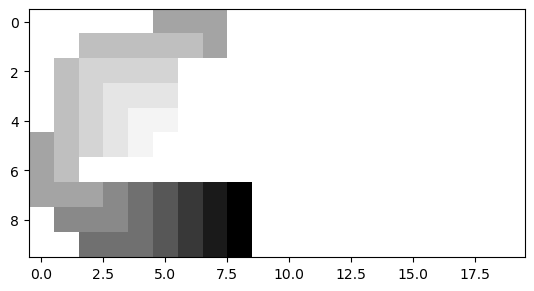

In [23]:
path, discovered = astar(start, final, euclidean_distance)
print("Path using Euclidean distance:", path)
display_map(discovered)

Path using Manhattan distance: [(5, 5), (5, 4), (5, 3), (5, 2), (6, 1), (7, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]


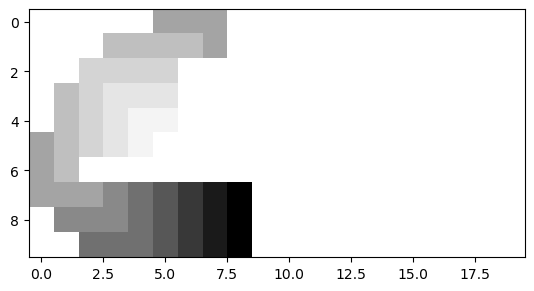

In [24]:
path, discovered = astar(start, final, manhattan_distance)
print("Path using Manhattan distance:", path)
display_map(discovered)

### Task 3

* Which heuristic function can be used in our problem, when we can move diagonally on the map?
* Which is the best one to use?
* What if we could only move in the 4 cardinal directions?

In [ ]:
# 1. Diagonal movement - Euclidean
#    For diagonal movement, Euclidean distance is the most appropriate heuristic,
#    because it reflects the shortest possible path (straight line) between two points.

# 2. Euclidean distance, as it is admissible and consistent
#    for diagonal movement.

# 3. If movement is restricted to the 4 cardinal directions 
#    the Manhattan distance
#    becomes the best heuristic, 
#    since it accurately measures the minimum number of steps
#    required
#    without considering diagonal shortcuts. 